## Capítulo 3: Clasificación


En el capítulo 1 se mencionó que las tareas de aprendizaje supervisado más comunes son la **regresión** (predicción de valores) y la **clasificación** (predicción de clases).

En el capítulo 2 se exploró una tarea de **regresión**, prediciendo los valores de la vivienda, usando algoritmos como la regresión lineal, Random Forest y árboles aleatorios.

En este capítulo nos centraremos en **SISTEMAS DE CLASIFICACIÓN**.

### MNIST

Vamos a usar el conjunto de datos de MNIST, que contiene 70 000 imágenes reducidas de dígitos escritas a mano.

Cada imágen está etiquetada con el código que representa.

Es el "hola mundo" del aprendizaje automático.

</br></br>
Vamos a usar la funcionalidad de Sklearn para descargar el conjunto de datos de MNIST de OpenML:

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

El paquete `sklear.datasets` contiene en su mayoría 3 tipos de funciones:

- Funciones `fetch_*`: Como `fetch_openml()` para descargar datasets de la vida real.

- Funciones `load_*` para cargar pequeños datasets de juguete.

- Funciones `make_*` para generar datasets falsos, prácticos para test.


Normalmente contienen los siguientes atributos:

* **"DESCR"**: Descripción del conjunto de datos.

* **"data"**: Datos de entrada en forma de matriz NumPy 2D.

* **"target"**: Etiquetas en forma de matriz NumPy 1D.


La función `fetch_openml()`, de forma predeterminada, retorna las entradas como Pandas DataFrame y las etiquetas como Pandas Series.

Pero el conjunto de datos de MNIST contiene imágenes y **los DataFrame no son buenos para eso**.

Es preferible configurar `as_frame=False` para tener los datos como matrices NumPy.

Veamos estas matrices:

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

Hay 70.000 imágenes y cada una de ellas contiene **784** features.

Esto de debe a que cada imagen tiene una resolución de **28x28** píxeles y cada característica representa la intensidad del píxel de **0 (white) - 255 (black)**.

Tomemos una imagen del dataset.

Todo lo que tenemos que hacer es tomar el **vector de características de esa instancia** (imagen), redimensionarlo (`reshape`) a un array de 28x28 y mostrarlo por pantalla usando matplotlib con el ajuste de color `cmap="binary"` para obtener una escapa de grises conde el 0 es blanco y el 255 es negro.

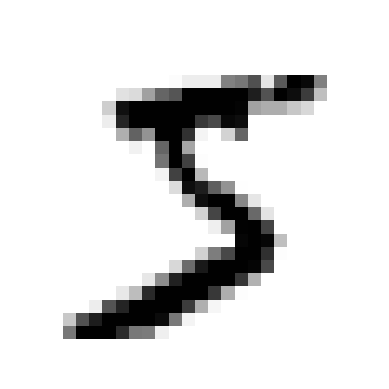

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit = X[0] # El primer elemento del dataset (número 5)
plot_digit(some_digit)
plt.show()

Si comprobamos su etiqueta, nos dice que efectivamente es un **5**.

In [8]:
y[0]

'5'

Normalmente separamos una pequeña parte del dataset y lo usamos para test antes de inspeccionar los elementos.

En este caso no es necesario porque la herramienta de `fetch_openml()` que estamos usando ya ha separado previamente los sets en **entrenamiento (primeras 60.000 imagenes)** y **test (10.000 imagenes)**.

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

El conjunto de entrenamiento ya viene barajado para nosotros, lo cual garantiza que todos los pliegues de cross-validation serán similares (no queremos que a algún pliegue le falten dígitos).

Además, algunos algoritmos de aprendizaje automático son sensibles al orden de las instancias de entrenamiento y funcionan mal si ven muchas instancias similares seguidas (no randomizadas).

Hay que mezclar previamente el conjunto de datos.

![muestra](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0302.png)

### Entrenando un clasificador binario

Vamos a simplificar el problema e **identificar sólo un dígito**, el número 5.

Esto es un "detector de 5" y se considera un *clasificador binario* que es capaz de distinguir entre dos clases:

* ES 5
* NO ES 5

Primero creamos los vectores de entrenamiento y test propios para este ejercicio:

In [10]:
# True si es 5 y False si no lo es

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [11]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [12]:
y_test_5

array([False, False, False, ..., False,  True, False])

Lo único que hemos cambiado es el vector de etiquetas, que en vez de tener 10 posibilidades, ahora tiene 2 (Sí, No).

Ahora vamos a tomar un clasificador y entrenarlo.

Una buena forma de empezar es usar el clasificador ***stochastic gradient descent*** (SGD) o descenso del gradiente estocástico.

Está dentro de la clase `SGDClassifier` de SKLearn.

Este clasificador es capaz de manejar datasets muy grandes de forma eficiente ya que toma las instancias de forma independiente (una por una) y hace que sea un **algoritmo muy conveniente para el aprendizaje online**.

In [13]:
# Creamos un SGDClassifier y lo entrenamos con todo el conjunto de entrenamiento

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Ahora podemos usarlo para detectar imágenes del número 5:

In [14]:
sgd_clf.predict([some_digit])

array([ True])

Nos da como resultado **True**, lo que significa que es un 5.


Una vez comprobado que funciona, vamos a evaluar el rendimiento.

### Medidas de rendimiento

**Evaluar un clasificador suele ser mas complejo que evaluar un regresor**.

Hay una gran cantidad de formas de medir el rendimiento así que prepara un café que empezamos.